**Author: Fitria Dwi Wulandari (wulan391@sci.ui.ac.id) - January 03, 2021.**

# Customer Churn Prediction

**Goal**: Building a machine learning models to predict customer churn.

## Data Loading

In [3]:
# Import library
import pandas as pd

In [10]:
# Import dataset
customer = pd.read_csv('telco_final.csv')
print("Dataset size: %d columns dan %d rows.\n" % customer.shape)
customer_telco.head(5)

Dataset size: 6950 columns dan 13 rows.



,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


- `UpdatedAt` : Periode of data taken.
- `customerID` : Customer ID.
- `gender` : Whether the customer is a male or a female (Male, Female).
- `SeniorCitizen` : Whether the customer is a senior citizen or not (Yes, No).
- `Partner` : Whether the customer has a partner or not (Yes, No).
- `tenure` : Number of months the customer has stayed with the company.
- `PhoneService` : Whether the customer has a phone service or not (Yes, No).
- `InternetService` : Customer’s internet service provider (Yes, No).
- `StreamingTV` : Whether the customer has streaming TV or not (Yes, No).
- `PaperlessBilling` : Whether the customer has paperless billing or not (Yes, No).
- `MonthlyCharges` : The amount charged to the customer monthly.
- `TotalCharges` : The total amount charged to the customer.
- `Churn` : Whether the customer churned or not (Yes, No).

In [11]:
# Number of unique IDs
customer.customerID.nunique()

6950

## Data Preprocessing

**Note:** The dataset used in this project is a dataset that has been cleaned in [Data-Cleansing](https://github.com/fitria-dwi/Data-Cleansing).

In [46]:
# Delete unnecessary columns
customer = customer.drop(['customerID','UpdatedAt'], axis=1)

In [47]:
customer.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


##  Exploratory Data Analysis (EDA)

In [48]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

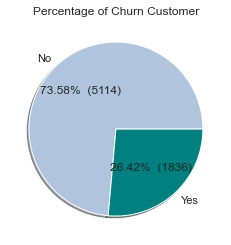

In [49]:
# Percentage of churn customer
labelschurn = ['No','Yes']
valueschurn = customer['Churn'].value_counts().values
colors=['lightsteelblue','teal']
def make_autopct(valueswifi):
    def my_autopct(pct):
        total = sum(valueswifi)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.pie(valueschurn, colors=colors, labels=labelschurn, autopct=make_autopct(valueschurn), shadow=True)
plt.title('Percentage of Churn Customer')
plt.show()

It shows that customers who don't churn are more dominant, with details on Churn about 26% and No-Churn about 74%.

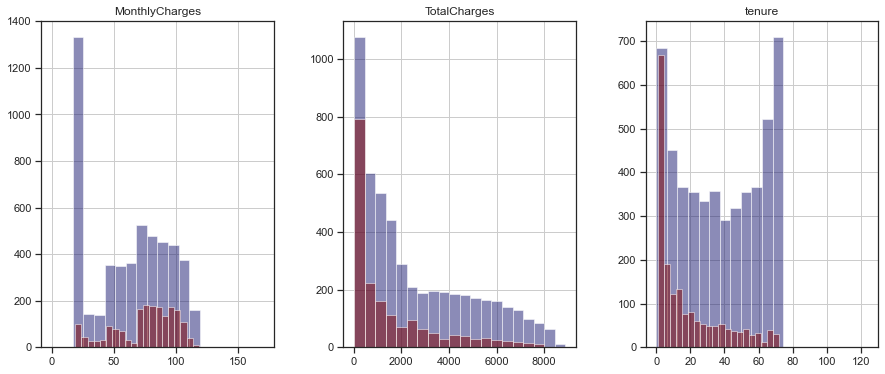

In [50]:
# EDA for numeric variables

# Creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

customer[customer.Churn == 'No'][numerical_features].hist(bins=20, color='midnightblue', alpha=0.5, ax=ax)
customer[customer.Churn == 'Yes'][numerical_features].hist(bins=20, color='maroon', alpha=0.5, ax=ax)
plt.show()

It shows that:

- `MonthlyCharges` variable shows a tendency that the smaller the monthly fee charged, the less likely it is to churn.
- `TotalCharges` variable shows no tendency toward churn customers.
- `tenure` variable shows a tendency that the longer the customer subscribes, the less likely it is to churn.

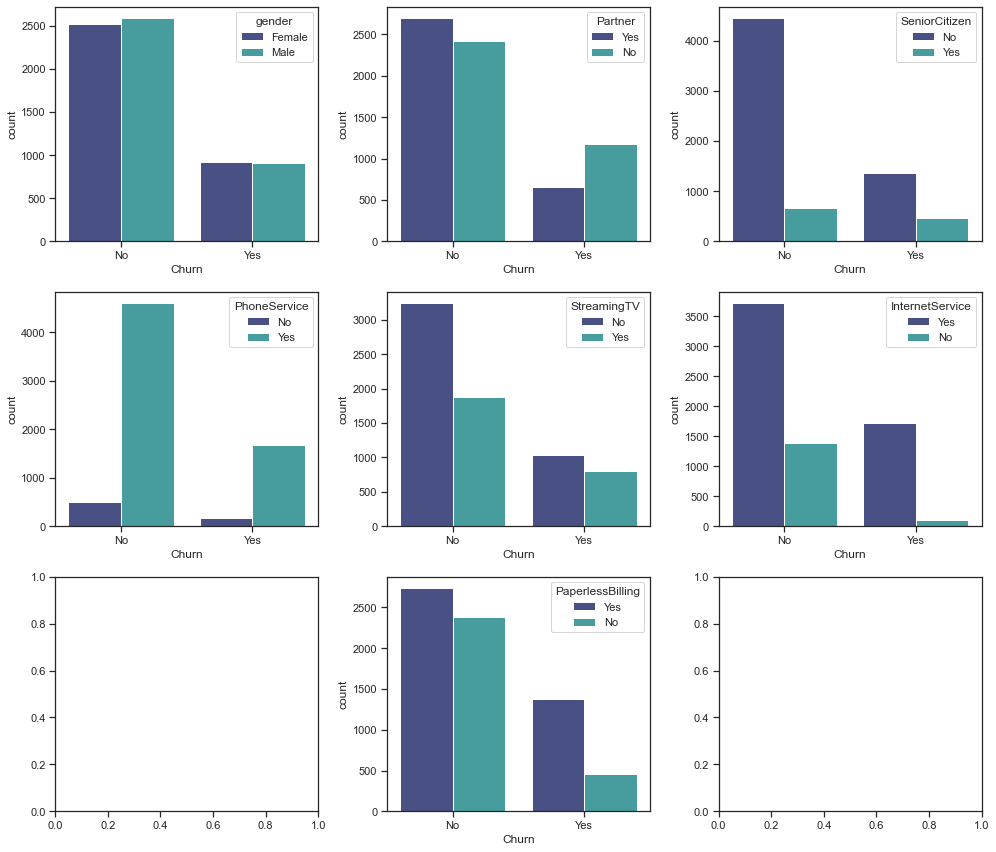

In [51]:
# EDA for categorical variables
sns.set(style='ticks')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=customer, x='Churn', hue='gender', ax=ax[0][0], palette="mako")
sns.countplot(data=customer, x='Churn', hue='Partner', ax=ax[0][1], palette="mako")
sns.countplot(data=customer, x='Churn', hue='SeniorCitizen', ax=ax[0][2], palette="mako")
sns.countplot(data=customer, x='Churn', hue='PhoneService', ax=ax[1][0], palette="mako")
sns.countplot(data=customer, x='Churn', hue='StreamingTV', ax=ax[1][1], palette="mako")
sns.countplot(data=customer, x='Churn', hue='InternetService', ax=ax[1][2], palette="mako")
sns.countplot(data=customer, x='Churn', hue='PaperlessBilling', ax=ax[2][1], palette="mako")
plt.tight_layout()
plt.show()

It shows that:

- There is no significant difference for customer churn when viewed from the gender variable.
- There is a tendency that customer churn are people who don't have a partner (`partner`: No), people who don't have senior citizen status (`SeniorCitizen`: No), people who have internet service (`InternetService`: Yes), and people whose bills are paperless (`PaperlessBilling`: Yes).

## Building a Model
The following is the algorithm that will be used when building a model:

1. Logistic Regression
2. Random Forest Classifier
3. Gradient Boosting Classifier

### Data Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

# Convert all the non-numeric columns to numerical data types
for column in customer.columns:
    if customer[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    customer[column] = LabelEncoder().fit_transform(customer[column])

<ipython-input-52-35b06c05faf8>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if customer[column].dtype == np.number: continue


In [53]:
customer.describe()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.415827,0.903741,0.384317,0.783453,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.561336,0.294967,0.486468,0.411921,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,73.000000,1.000000,1.000000,1.000000,1.000000,169.931250,8889.131250,1.000000


### Data Splitting

In [54]:
from sklearn.model_selection import train_test_split

# Define the independent variable (x) and the dependent variable (y)
features = customer.drop('Churn', axis = 1) # Independent variable (x)
target = customer['Churn'] # Dependent variable (y)

In [56]:
# Split x and y into the train and test sets. Test data are 30% of the total data entry and the rest should be train data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print('The number of rows and columns of x_train is:', x_train.shape,'and the number of rows and columns of y_train is:', y_train.shape)
print('Churn percentage in training data is:')
print(y_train.value_counts(normalize=True))

print('The number of rows and columns of x_test is:', x_test.shape,'and the number of rows and columns of y_test is:', y_test.shape)
print('Churn percentage in testing data is:')
print(y_test.value_counts(normalize=True))

The number of rows and columns of x_train is: (4865, 10) and the number of rows and columns of y_train is: (4865,)
Churn percentage in training data is:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
The number of rows and columns of x_test is: (2085, 10) and the number of rows and columns of y_test is: (2085,)
Churn percentage in testing data is:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


### Modelling

**1. Logistic Regression**

**Performance of Train Data Model**

In [57]:
from sklearn.linear_model import LogisticRegression

# Train the model
log_model = LogisticRegression().fit(x_train, y_train)
print('Logistic Regression Model Fitting: \n',log_model)

Logistic Regression Model Fitting: 
 LogisticRegression()


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict
y_train_pred_log = log_model.predict(x_train)

# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.79      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.79      0.79      4865



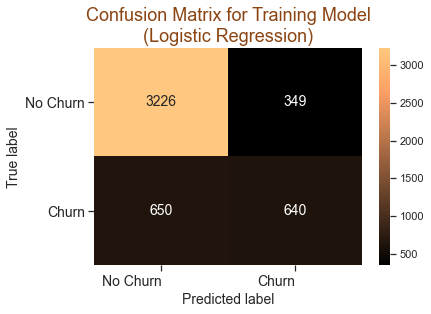

In [59]:
# Form confusion matrix as a DataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='copper')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='saddlebrown')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

From the train data, it shows that the model can predict data with 80% accuracy. There is 639 true positive, 3232 true negative, 343 false positive, and 651 false negative.

**Note:**
- True positive is when you predicted Churn and it’s true.
- True negative is when you predicted No Churn and it’s true.
- False positive is when you predicted Churn and it’s false.
- False negative is when you predicted No Churn and it’s false.

**Performance of Test Data Model**

In [60]:
# Predict
y_test_pred_log = log_model.predict(x_test)

# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



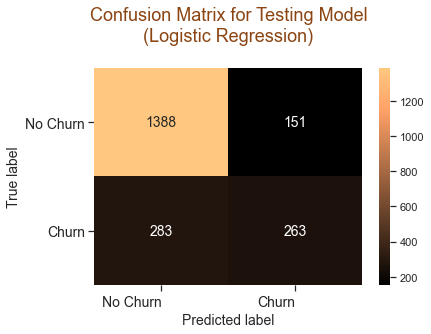

In [61]:
# Form confusion matrix as a DataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='copper')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='saddlebrown')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

From the test data, it shows that the model can predict data with 79% accuracy. There is 260 true positive, 1391 true negative, 148 false positive, and 286 false negative.

**2. Random Forest Classifier**

**Performance of Train Data Model**

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print('Random Forest Classifier Model Fitting: \n',rdf_model)

Random Forest Classifier Model Fitting: 
 RandomForestClassifier()


In [63]:
# Predict
y_train_pred_rdf = rdf_model.predict(x_train)

# Print classification report
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred_rdf))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



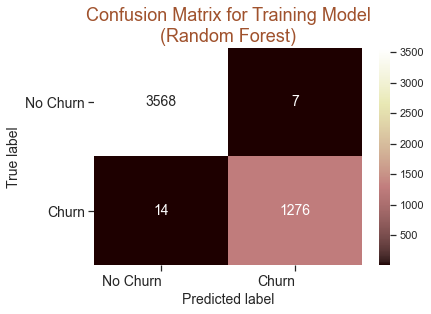

In [64]:
# Form confusion matrix as a DataFrame
confusion_matrix_rdf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rdf)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rdf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='sienna')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

From the train data, it shows that the model can predict data with 100% accuracy. There is 1275 true positive, 3568 true negative, 7 false positive, and 15 false negative.

**Performance of Test Data Model**

In [65]:
# Predict
y_test_pred_rdf = rdf_model.predict(x_test)

# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rdf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1539
           1       0.58      0.47      0.52       546

    accuracy                           0.77      2085
   macro avg       0.70      0.67      0.68      2085
weighted avg       0.76      0.77      0.76      2085



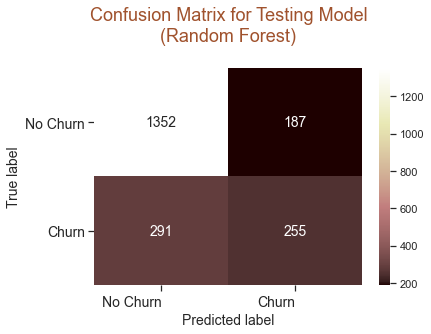

In [66]:
# Form confusion matrix as a DataFrame
confusion_matrix_rdf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rdf)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rdf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='sienna')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()


From the test data, it shows that the model can predict data with 77% accuracy. There is 259 true positive, 1352 true negative, 187 false positive, and 287 false negative.

**3. Gradient Boosting Classifier**

**Performance of Train Data Model**

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print('Gradient Boosting Classifier Model Fitting: \n',gbt_model)

Gradient Boosting Classifier Model Fitting: 
 GradientBoostingClassifier()


In [68]:
# Predict
y_train_pred_gbt = gbt_model.predict(x_train)

# Print classification report
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred_gbt))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



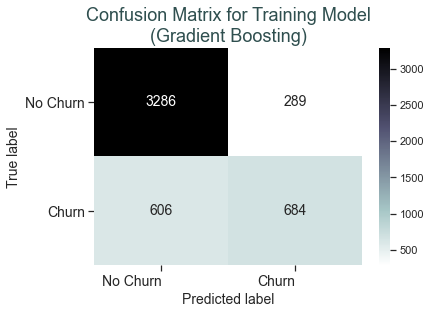

In [69]:
# Form confusion matrix as a DataFrame
confusion_matrix_gbt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gbt)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gbt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkslategrey')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

From the train data, it shows that the model can predict data with 82% accuracy. There is 684 true positive, 3286 true negative, 289 false positive, and 606 false negative.

**Performance of Test Data Model**

In [70]:
# Predict
y_test_pred_gbt = gbt_model.predict(x_test)

# Print classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred_gbt))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



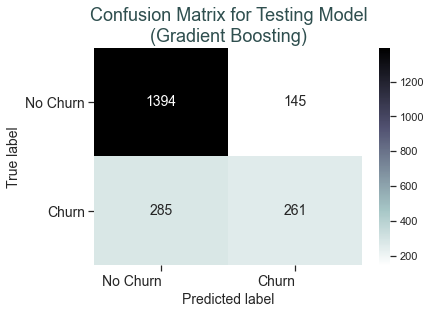

In [71]:
# Form confusion matrix as a DataFrame
confusion_matrix_gbt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gbt)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gbt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkslategrey')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

From the test data, it shows that the model can predict data with 79% accuracy. There is 261 true positive, 1394 true negative, 145 false positive, and 285 false negative.

## Model Selection

A good model is a model that can provide good performance in the training and testing datasets.

- **Over-Fitting**: Good performance on the training data, poor generalization to other data.
- **Under-Fitting** : Poor performance on the training data and poor generalization to other data
- **Appropriate-Fitting** : Good performance on the training data, good generalization to other data.

| Algorithm | Training Data Accuracy | Testing Data Accuracy |
| :---: | :---: | :---: |
| Logistic Regression | 80% | 	79% |
| Random Forest Classifier | 100% | 	77% |
| Gradient Boosting Classifier | 82% | 	79% |

## Conclusion

Based on the model selection section, it's concluded that the **best model to predict the churn of telco customers** is the **logistic regression model**. This is because the logistic model tends to be able to predict data well in training and testing sets. On the other hand, other algorithms tend to overfit their performance.

Note: This doesn't lead to conclude that if we use logistic regression to do any modeling. You still have to do a lot of model building to determine which one is the best.